In [1]:
import os
import pandas as pd
import moviepy
import imcut

2160 2880
Select a ROI and then press SPACE or ENTER button!
Cancel the selection process by pressing c button!


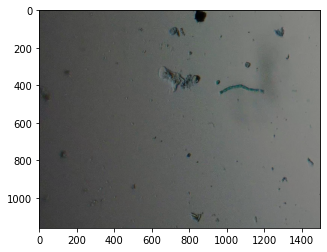

: 

In [4]:
import matplotlib.pyplot as plt
import cv2

# Load your video
video_path = '/Users/mikehemberger/Documents/vscode/microcosmus/data/videos-edited/2024_0109_111718_049_time-trimmed.mp4'
cap = cv2.VideoCapture(video_path)

ret, frame = cap.read()
height, width, _ = frame.shape
print(height, width)

plt.figure()
#plt.imshow(frame)
plt.imshow(frame[1000:int(height), 0:1500])
# Allow the user to select a region for cropping
rect_roi = cv2.selectROI("Select ROI", frame, showCrosshair=True)
cap.release()
cv2.destroyAllWindows()

In [8]:
im = frame[1000:int(height), 0:1500]
im.shape

(1160, 1500, 3)

In [13]:

# Apply the cropping to the entire video
cap = cv2.VideoCapture(video_path)
output_path = '2024_0109_111718_049_time-trimmed-cropped.mp4'
out = cv2.VideoWriter(output_path, cv2.VideoWriter_fourcc(*'mp4v'), cap.get(cv2.CAP_PROP_FPS), (1500, 1160))
#out = cv2.VideoWriter(output_path, cv2.VideoWriter_fourcc(*"MJPG"), cap.get(cv2.CAP_PROP_FPS), (1500, 1160))

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Apply the crop to each frame
    cropped_frame = frame[1000:int(height), 0:1500]

    # Write the cropped frame to the output video
    out.write(cropped_frame)

# Release resources
cap.release()
out.release()
cv2.destroyAllWindows()

In [ ]:
import imcut
import cv2

# Load your video
video_path = './data/videos/2024_0109_183814_056.MP4'
cap = cv2.VideoCapture(video_path)

# Read a frame to use as a reference for imcut
ret, frame = cap.read()

# Close the video capture
cap.release()

# Use imcut for interactive cropping
cutout = imcut.IMCUT(frame)
cutout.make_ui()
cutout.wait()

In [ ]:
from moviepy.editor import *

video = VideoFileClip('./data/videos/2024_0109_183814_056.MP4')

In [ ]:
video.preview()

In [ ]:

# Load your video
video_path = './data/videos/2024_0109_183814_056.MP4'
cutout = imcut.load(video_path)

# Show the interactive cropping GUI
cutout.show()

# After selecting the region of interest, save the cropped video
cropped_video_path = 'cropped_video.mp4'
cutout.save(cropped_video_path)

In [ ]:
video_root_dir = "./data/videos/"
image_root_dir = "./data/images/"

video_files = sorted([f for f in os.listdir(video_root_dir) if f.endswith(".MP4")])
video_filepaths = [os.path.join(video_root_dir, f) for f in video_files]

print(video_files[:10], "\n", video_filepaths[:10])


In [ ]:
from moviepy.editor import VideoFileClip


def get_video_info(file_path):
    clip = VideoFileClip(file_path)
    duration = clip.duration
    resolution = clip.size
    fps = clip.fps
    clip.close()  # Close the clip to release resources
    
    creation_time = os.path.getctime(file_path)

    return duration, resolution, fps, creation_time


In [ ]:
video_duration = list()
video_resolution = list()
video_creation = list()
video_fps = list()

for fp in video_filepaths:
    vid_duration, vid_resolution, vid_fps, vid_creation = get_video_info(fp)
    video_duration.append(vid_duration)
    video_resolution.append(vid_resolution)
    video_creation.append(vid_creation)
    video_fps.append(vid_fps)

In [ ]:
video_duration[:5]

In [ ]:
df = pd.DataFrame(video_filepaths, columns=["file_path"])
df["file_name"] = video_files
df["creation"] = video_creation
df["duration"] = video_duration
df["resolution"] = video_resolution
df["fps"] = video_fps
df["desc"] = None
df.tail(20)


In [ ]:
df.to_csv("./data/csvs/metadata.csv")